In [94]:
# Código de espiral de Ekman
# [Gonzalo Salvador Hidalgo Faloco] - 2do Cuatrimestre 2025 Oceanografía Teórica
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Configuramos los parámetros de la Capa de Ekman

In [95]:
f = 1e-4  # Parámetro de Coriolis [s⁻¹]
Az = 0.01  # Viscosidad turbulenta [m²/s]
rho = 1025  # Densidad del agua [kg/m³]
tau_x = 0.0  # Esfuerzo del viento en x [N/m²]
tau_y = 0.1  # Esfuerzo del viento en y [N/m²]

Profundidad de Ekman: 44.43 m
e-folding: 14.14 m


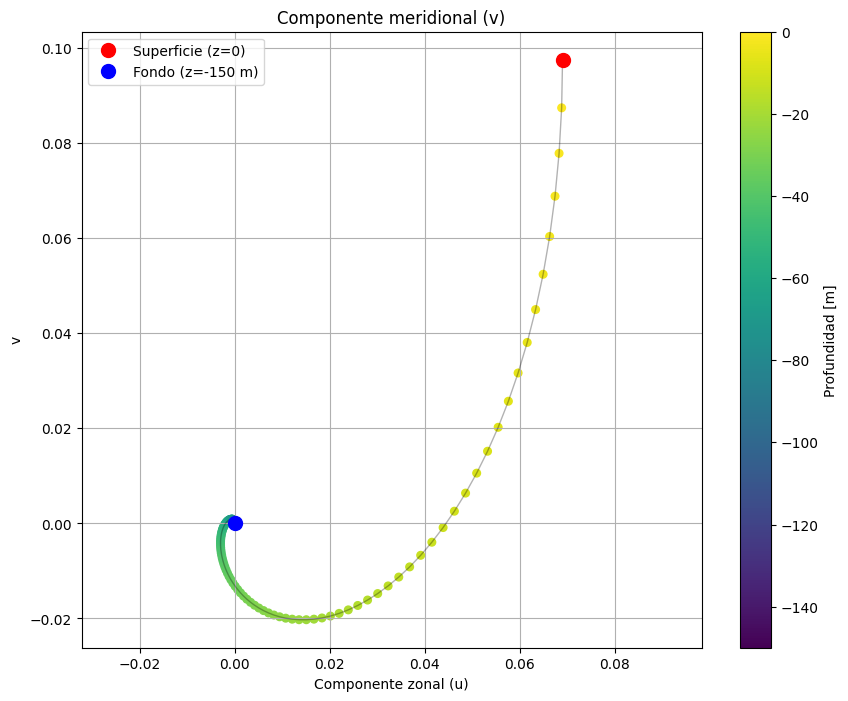

In [96]:
# Cálculo de la profundidad de Ekman
D_ekman = np.pi * np.sqrt(2 * Az / np.abs(f)) # La profundidad que usamos en las teóricas

# e-folding. otro criterio no excluyente para la profundidad de Ekman
ze = np.sqrt((2*Az)/(np.abs(f)))

# Defino un vector de profundidades en los cuales supongo válido el balance de Ekman
z_max = 150  # Profundidad máxima [m]
nz = 200  # Número de puntos
z = np.linspace(0, -z_max, nz)
print(f"Profundidad de Ekman: {D_ekman:.2f} m")
print(f"e-folding: {ze:.2f} m")
#Defino la fase
phi = (np.sign(f)*((z/ze) - (np.pi/4)))

# Solución para las componentes de velocidad
u = (ze / (rho * Az * np.sqrt(2))) * \
    np.exp(z/ze) * (tau_x * np.cos(phi) - tau_y * np.sin(phi))

v = (np.sqrt(2) / (rho * np.sqrt(Az * np.abs(f)))) * \
    np.exp(z/ze) * (tau_x * np.sin(phi) + tau_y * np.cos(phi))

# Velocidad total
V = np.sqrt(u**2 + v**2)

# Gráfico 2D: Espiral de Ekman
plt.figure(figsize=(10, 8))
sc = plt.scatter(u, v, c=z, cmap='viridis', s=30)
plt.plot(u, v, 'k-', alpha=0.3, linewidth=1)  # Línea conectando los puntos
plt.colorbar(sc, label='Profundidad [m]')
plt.plot(u[0], v[0], 'ro', markersize=10, label='Superficie (z=0)')
plt.plot(u[-1], v[-1], 'bo', markersize=10, label=f'Fondo (z={-z_max} m)')
plt.xlabel('Componente zonal (u)')
plt.ylabel('v')
plt.title('Componente meridional (v)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()



Profundidad de Ekman: 14.05 m
Profundidad de Ekman: 44.43 m
Profundidad de Ekman: 140.50 m


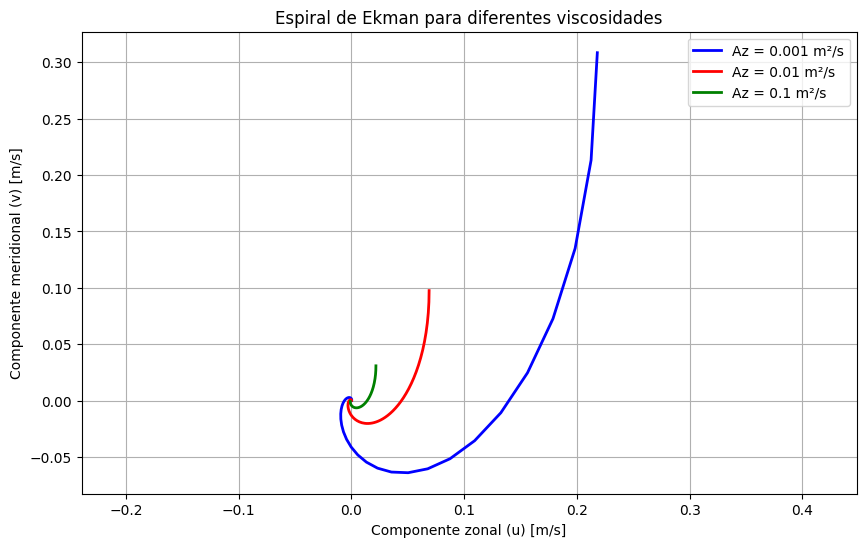

In [97]:
# Efecto de diferentes viscosidades
viscosidades = [0.001, 0.01, 0.1]
colores = ['blue', 'red', 'green']

plt.figure(figsize=(10, 6))
for Az_val, color in zip(viscosidades, colores):
    ze_val = np.sqrt(2 * Az_val / np.abs(f))
    De_val = np.pi * np.sqrt(2 * Az_val / np.abs(f))
    phi_val = (np.sign(f)*((z/ze_val) - (np.pi/4)))

    u_val = (ze_val / (rho * Az_val * np.sqrt(2))) * \
    np.exp(z/ze_val) * (tau_x * np.cos(phi_val) - tau_y * np.sin(phi_val))

    v_val = (np.sqrt(2) / (rho * np.sqrt(Az_val* np.abs(f)))) * \
    np.exp(z/ze_val) * (tau_x * np.sin(phi_val) + tau_y * np.cos(phi_val))

    plt.plot(u_val, v_val, color=color, linewidth=2,
             label=f'Az = {Az_val} m²/s')
    print(f"Profundidad de Ekman: {De_val:.2f} m")

plt.xlabel('Componente zonal (u) [m/s]')
plt.ylabel('Componente meridional (v) [m/s]')
plt.title('Espiral de Ekman para diferentes viscosidades')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

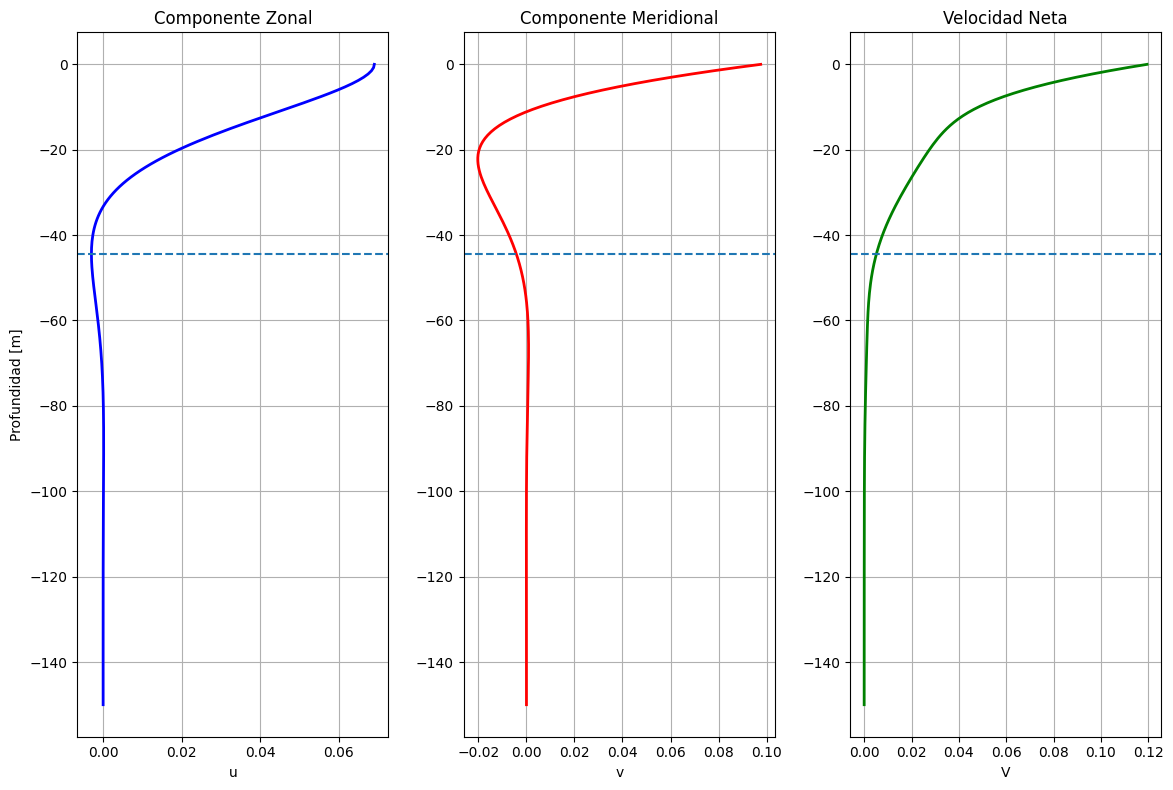

In [98]:
# Gráfico de perfiles de velocidad

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.plot(u, z, 'b-', linewidth=2)
plt.axhline(-D_ekman, linestyle='--')
plt.xlabel('u')
plt.ylabel('Profundidad [m]')
plt.title('Componente Zonal')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(v, z, 'r-', linewidth=2)
plt.axhline(-D_ekman, linestyle='--')
plt.xlabel('v')
#plt.ylabel('Profundidad [m]')
plt.title('Componente Meridional')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(V, z, 'g-', linewidth=2)
plt.axhline(-D_ekman, linestyle='--')
plt.xlabel('V')
#plt.ylabel('Profundidad [m]')
plt.title('Velocidad Neta')

plt.grid(True)

plt.tight_layout()
plt.show()


Gráfica 3D

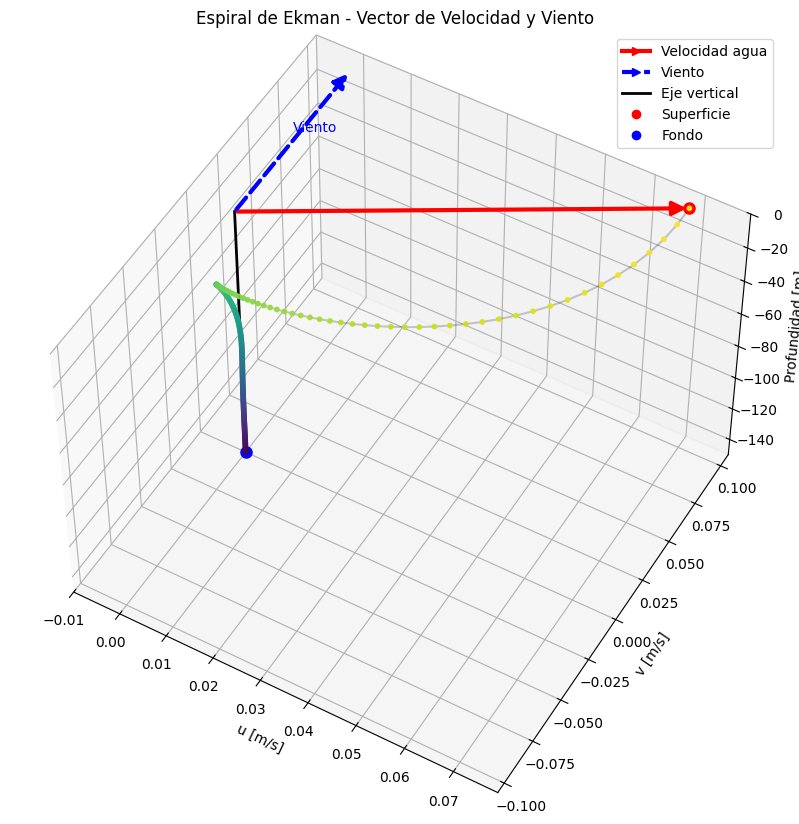

In [108]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

#Inicializamos la librería para que se visualicen mejor los vectores en superficie
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Defino el eje verticual del cual salen las direcciones de velocidad
ax.plot([0, 0], [0, 0], [z[0], z[-1]], 'k-', linewidth=2, label='Eje vertical')

# Graficamos el espiral como puntos en xyz
sc = ax.scatter(u, v, z, c=z, cmap='viridis', s=10, alpha=0.9)
ax.plot(u, v, z, 'k-', alpha=0.2)
ax.plot(u[0], v[0], z[0], 'ro', markersize=8, label='Superficie')
ax.plot(u[-1], v[-1], z[-1], 'bo', markersize=8, label='Fondo')

# Vector de velocidad superficial con FancyArrowPatch
arrow_vel = Arrow3D([0, u[0]], [0, v[0]], [0, 0],
                   mutation_scale=20,
                   arrowstyle='-|>',
                   color='red',
                   linewidth=3)
ax.add_artist(arrow_vel)

# Vector del viento (escalado para visualización)
# Normalizar para que tenga longitud similar al vector de velocidad
magnitud_viento = np.sqrt(tau_x**2 + tau_y**2)
magnitud_velocidad = np.sqrt(u[0]**2 + v[0]**2)

if magnitud_viento > 0:
    # Dado que el viento y la velocidad se encuentran con diferentes unidades, lo escalo en función de la velocidad para que sea visible
    escala = magnitud_velocidad / magnitud_viento * 0.8  # 80% del tamaño del vector de velocidad

    arrow_viento = Arrow3D([0, tau_x * escala], [0, tau_y * escala], [0, 0], #el vector viento no tiene componente en z! xs->coordenada desde donde sale hacia donde va
                          mutation_scale=20,
                          arrowstyle='-|>',
                          color='blue',
                          linewidth=3,
                          linestyle='--')
    ax.add_artist(arrow_viento)

    ax.text(tau_x * escala / 2, tau_y * escala / 2, 5,
            'Viento', color='blue', fontsize=10)

# Ajustamos los límites de los ejes
all_x = [0, u[0], -tau_x * escala if magnitud_viento > 0 else 0]
all_y = [0, v[0], -tau_y * escala if magnitud_viento > 0 else 0]

ax.set_xlim([min(all_x) - 0.01, max(all_x) + 0.01])
ax.set_ylim([min(all_y) - 0.01, max(all_y) + 0.01])
ax.set_zlim([z[-1], z[0]])  # Invertido porque z es negativo hacia abajo

ax.set_xlabel('u [m/s]')
ax.set_ylabel('v [m/s]')
ax.set_zlabel('Profundidad [m]')
ax.set_title('Espiral de Ekman - Vector de Velocidad y Viento')

# Crear leyenda personalizada
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', lw=3, marker='>', label='Velocidad agua'),
    Line2D([0], [0], color='blue', lw=3, marker='>', linestyle='--', label='Viento'),
    Line2D([0], [0], color='black', lw=2, label='Eje vertical'),
    Line2D([0], [0], color='red', marker='o', lw=0, label='Superficie'),
    Line2D([0], [0], color='blue', marker='o', lw=0, label='Fondo')
]
ax.legend(handles=legend_elements)

# Cambiar ángulo de vista para mejor visualización

# para azim: 40 para f<0 y 300 para f>0 funciona bien.
ax.view_init(elev=50, azim=300)

plt.show()

In [ ]:
# Visualización 3D de la espiral
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1,1,1, projection='3d')

# Espiral en 3D - CORREGIDO
sc = ax.scatter(u, v, z, c=z, cmap='viridis', s=20)
ax.plot(u, v, z, 'k-', alpha=0.3)
ax.plot(u[0], v[0], z[0], 'ro', markersize=10, label='Superficie')
ax.plot(u[-1], v[-1], z[-1], 'bo', markersize=10, label='Fondo')

ax.set_xlabel('Componente zonal (u) [m/s]')
ax.set_ylabel('Componente meridional (v) [m/s]')
ax.set_zlabel('Profundidad [m]')
ax.set_title('Espiral de Ekman 3D')
plt.colorbar(sc, ax=ax, label='Profundidad [m]')
ax.legend()
plt.show()